# Introduction

The purpose of this project is to use Machine Learning methods to classify players into skill groups that can be used to match players against one another in a multiplayer video game. The model will be evaluated using several metrics and then tested on random sample data to verify it's effectiveness. The data set consists of 1400+ players lifetime player data in a game called Fortnite. A link to the data set can be found below:

https://www.kaggle.com/datasets/iyadali/fortnite-players-stats

## Background

A large portion of those who play video games do so in multiplayer game modes where they compete with other players to win matches. As players spend more time playing a game, skill level gaps will begin to emerge between players. Since multiplayer game modes normally involve pitting players against each other, as this skill gap widens less skilled players can find themselves matched against experts, and vice versa. This can diminish how much players enjoy the game as they find it is too difficult to play against highly skilled players or that there is no challenge in being matched against lesser skilled players. It is in best interest, both monetarily and to uphold a positive reputation, to keep the interest of as many players as possible. Therefore, video game developers are incentivized to avoid two main reasons for player attrition:

1. Players will quickly lose interest in the game as the multiplayer will be too easy or hard
2. New players are less likely to play the game if they know the skill gap is too wide

Video game developers seek to avoid this problem by creating a "matchmaking" system. This system is implemented to create multiplayer matches where only players that have a similar skill level are matched against one another. 

In [79]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score

all_player_data = pd.read_csv('Fortnite_players_stats.csv')
all_player_data.head(10)

,Player,Solo score,Solo top1,Solo kd,Solo winRatio,Solo matches,Solo kills,Solo minutesPlayed,Duos score,Duos top1,...,Squads kills,Squads minutesPlayed,LTM score,LTM top1,LTM top3,LTM kd,LTM winRatio,LTM matches,LTM kills,LTM minutesPlayed
0,Prospеring,2476763,1828,4.37,18.0,10150,36328,81389,4702684,5584,...,75787.0,117967.0,101589.0,170.0,118.0,5.78,26.8,634.0,2682.0,2865.0
1,BH nixxxay,439562,1694,8.71,29.1,5817,35895,12732,4065613,4141,...,117327.0,150439.0,151358.0,229.0,190.0,8.20,18.2,1259.0,8442.0,4206.0
2,Raпger,4519465,4582,9.60,34.0,13488,85481,122171,1137279,1390,...,76065.0,86684.0,452136.0,1180.0,818.0,11.12,32.9,3583.0,26726.0,12273.0
3,Idk_Pi,752869,121,0.84,3.3,3687,3005,32453,5326457,2249,...,6892.0,80016.0,1748407.0,190.0,246.0,2.33,5.4,3539.0,7787.0,33224.0
4,Twitch.GryphonRB,1136282,1327,6.32,30.0,4429,19591,36245,3692623,5743,...,46068.0,81424.0,556721.0,824.0,600.0,14.99,53.3,1546.0,10826.0,12019.0
5,Twitch Kayotica,2919037,1310,3.23,9.7,13438,39131,96777,1298412,1242,...,40507.0,89472.0,294971.0,184.0,185.0,4.81,11.7,1566.0,6654.0,8296.0
6,FaZe Replays,2389537,1454,3.84,7.8,18670,66161,76258,2508015,1935,...,40730.0,69693.0,383002.0,274.0,259.0,4.49,7.4,3718.0,15447.0,12634.0
7,NiteGamerYT 190k,15872,6,0.47,1.4,429,200,739,6438735,5449,...,6803.0,30012.0,370497.0,185.0,267.0,2.67,8.2,2263.0,5541.0,12625.0
8,ᴮᵒˢˢン,6772116,6480,1.39,32.6,19864,18610,283835,118705,65,...,1238.0,19419.0,827372.0,118.0,116.0,2.01,3.8,3067.0,5937.0,19174.0
9,CIUPEA 144.HZ,54479,9,0.61,0.5,1938,1174,2441,5873450,1250,...,6695.0,51058.0,440353.0,97.0,199.0,1.09,3.2,3048.0,3205.0,17273.0


In [80]:
solo_player_data = all_player_data[['Solo score', 'Solo top1', 'Solo kd', 'Solo winRatio', 'Solo matches', 'Solo kills', 'Solo minutesPlayed']]

print(solo_player_data.info())
solo_player_data.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1435 entries, 0 to 1434
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Solo score          1435 non-null   int64  
 1   Solo top1           1435 non-null   int64  
 2   Solo kd             1435 non-null   float64
 3   Solo winRatio       1435 non-null   float64
 4   Solo matches        1435 non-null   int64  
 5   Solo kills          1435 non-null   int64  
 6   Solo minutesPlayed  1435 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 78.6 KB
None


,Solo score,Solo top1,Solo kd,Solo winRatio,Solo matches,Solo kills,Solo minutesPlayed
0,2476763,1828,4.37,18.0,10150,36328,81389
1,439562,1694,8.71,29.1,5817,35895,12732
2,4519465,4582,9.60,34.0,13488,85481,122171
3,752869,121,0.84,3.3,3687,3005,32453
4,1136282,1327,6.32,30.0,4429,19591,36245
5,2919037,1310,3.23,9.7,13438,39131,96777
6,2389537,1454,3.84,7.8,18670,66161,76258
7,15872,6,0.47,1.4,429,200,739
8,6772116,6480,1.39,32.6,19864,18610,283835
9,54479,9,0.61,0.5,1938,1174,2441


In [81]:
solo_player_data.describe().round(2)

,Solo score,Solo top1,Solo kd,Solo winRatio,Solo matches,Solo kills,Solo minutesPlayed
count,1435.0,1435.00,1435.00,1435.00,1435.00,1435.00,1435.00
mean,1088202.4,328.91,1.82,4.85,6911.06,11781.84,43517.14
std,887263.9,529.19,1.16,5.33,5408.22,11417.34,36314.88
min,4453.0,0.00,0.08,0.00,30.00,28.00,210.00
25%,435517.0,65.50,1.05,1.60,2875.00,3861.00,16922.00
50%,907001.0,162.00,1.48,2.90,5728.00,8452.00,35762.00
75%,1506555.0,366.00,2.20,6.10,9585.00,15993.00,59471.00
max,6772116.0,6480.00,9.60,44.10,36487.00,89023.00,283835.00


<AxesSubplot:xlabel='Solo score', ylabel='Count'>

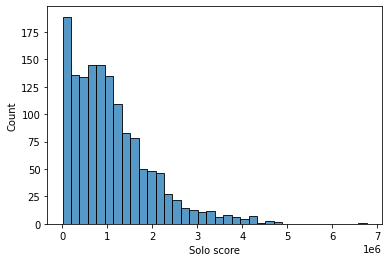

In [82]:
sns.histplot(data=solo_player_data, x='Solo score')


Need to remove outliers from data set

In [83]:
solo_player_data = solo_player_data[(np.abs(stats.zscore(solo_player_data)) < 3).all(axis=1)].reset_index(drop=True)

solo_player_data.head(10)


,Solo score,Solo top1,Solo kd,Solo winRatio,Solo matches,Solo kills,Solo minutesPlayed
0,2476763,1828,4.37,18.0,10150,36328,81389
1,752869,121,0.84,3.3,3687,3005,32453
2,2919037,1310,3.23,9.7,13438,39131,96777
3,15872,6,0.47,1.4,429,200,739
4,54479,9,0.61,0.5,1938,1174,2441
5,208411,103,4.17,12.2,844,3093,6661
6,1665575,535,2.30,5.0,10596,23161,55978
7,478280,25,0.70,1.0,2581,1785,21679
8,2469301,612,1.42,4.5,13464,18301,106526
9,551309,62,1.59,2.5,2527,3930,22014


## Visualize data distributions

Visualizing the distributions of the player data could help prove that a player skill curve exists in the game. If the data shows a player skill curve exists then we can use this data organize players into skill groups based on their statistics.

We will also want to find if there is any correlation between variables in the data set. Correlated variables may help predict player skill level to a higher degree of confidence.

Text(0.5, 1.0, 'Distribution of Solo Minutes Played Among Players')

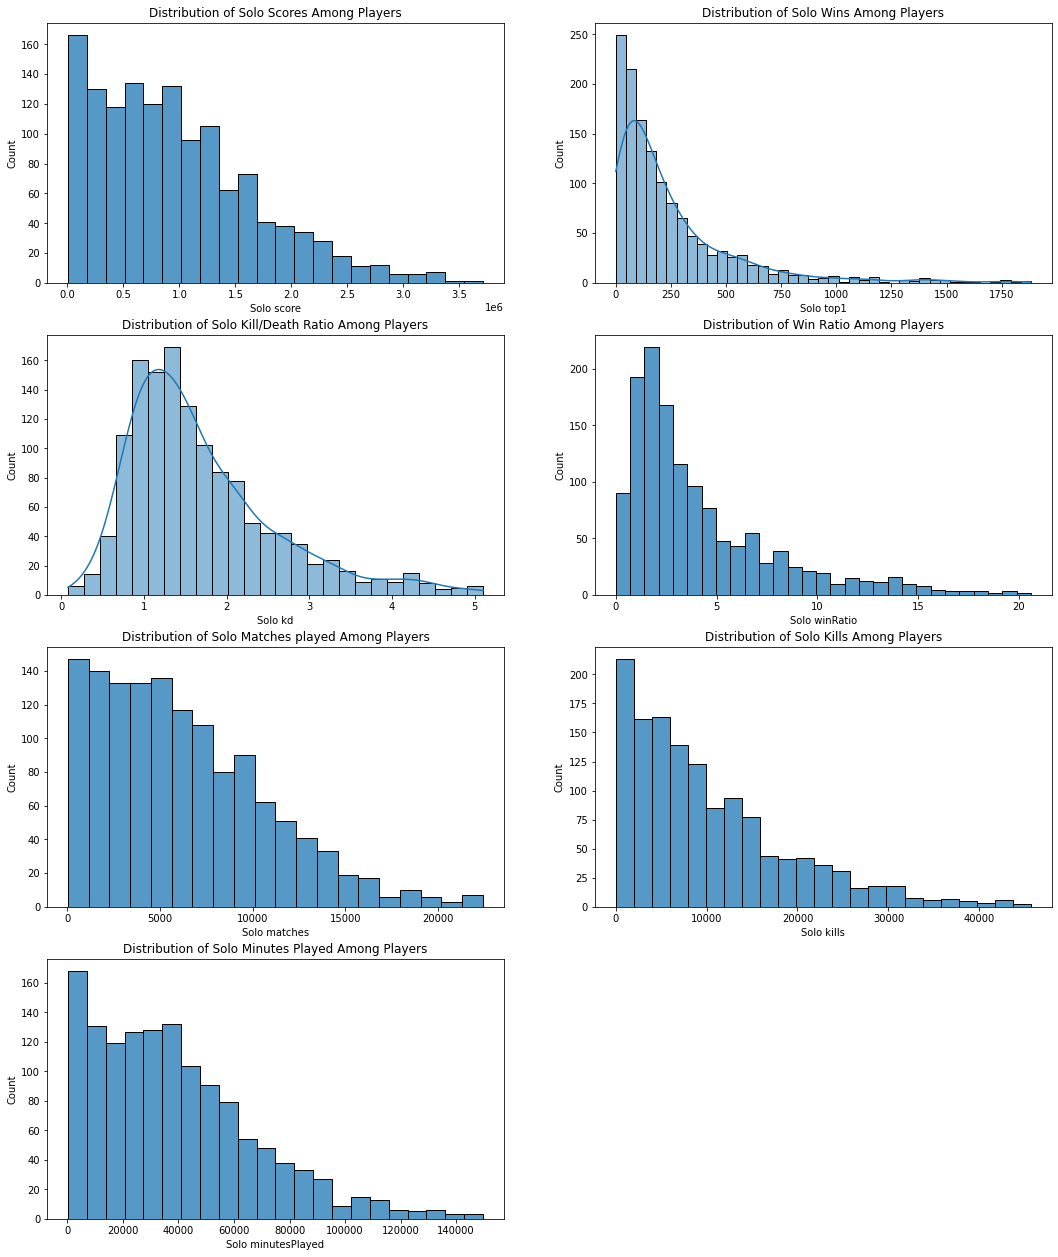

In [84]:
plt.figure(figsize=(18,22))
plt.subplot(421)
sns.histplot(data=solo_player_data, x='Solo score')
plt.title('Distribution of Solo Scores Among Players')
plt.subplot(422)
sns.histplot(data=solo_player_data, x='Solo top1', kde=True)
plt.title('Distribution of Solo Wins Among Players')
plt.subplot(423)
sns.histplot(data=solo_player_data, x='Solo kd', kde=True)
plt.title('Distribution of Solo Kill/Death Ratio Among Players')
plt.subplot(424)
sns.histplot(data=solo_player_data, x='Solo winRatio')
plt.title('Distribution of Win Ratio Among Players')
plt.subplot(425)
sns.histplot(data=solo_player_data, x='Solo matches')
plt.title('Distribution of Solo Matches played Among Players')
plt.subplot(426)
sns.histplot(data=solo_player_data, x='Solo kills')
plt.title('Distribution of Solo Kills Among Players')
plt.subplot(427)
sns.histplot(data=solo_player_data, x='Solo minutesPlayed')
plt.title('Distribution of Solo Minutes Played Among Players')


As illustrated above, most player statistics are highly left skewed. This suggest that a player skill curve existThe 

## Visualize Data Relationships

<AxesSubplot:xlabel='Solo score', ylabel='Solo kd'>

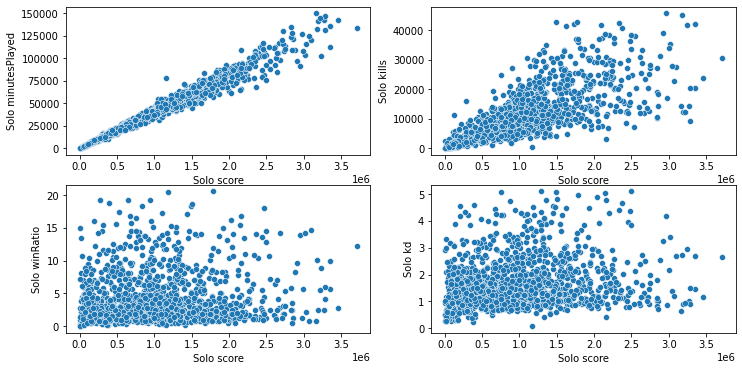

In [85]:
df = solo_player_data
X = solo_player_data['Solo score']

plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.scatterplot(data = solo_player_data, x = X, y = 'Solo minutesPlayed')
plt.subplot(2,2,2)
sns.scatterplot(data = solo_player_data, x = X, y = 'Solo kills')
plt.subplot(2,2,3)
sns.scatterplot(data = solo_player_data, x = X, y = 'Solo winRatio')
plt.subplot(2,2,4)
sns.scatterplot(data = solo_player_data, x = X, y = 'Solo kd')

<AxesSubplot:xlabel='Solo top1', ylabel='Solo kd'>

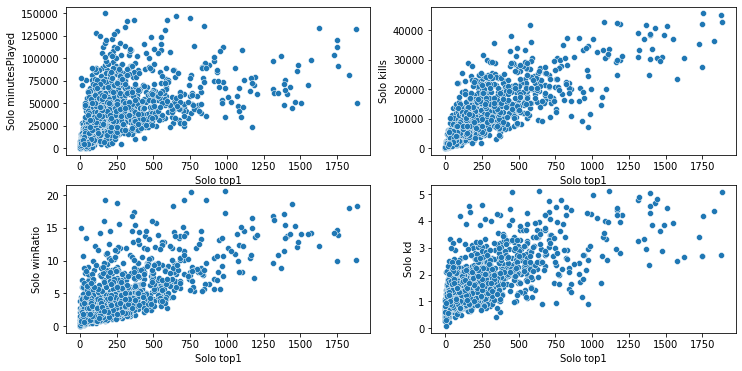

In [86]:
X = solo_player_data['Solo top1']

plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.scatterplot(data = solo_player_data, x = X, y = 'Solo minutesPlayed')
plt.subplot(2,2,2)
sns.scatterplot(data = solo_player_data, x = X, y = 'Solo kills')
plt.subplot(2,2,3)
sns.scatterplot(data = solo_player_data, x = X, y = 'Solo winRatio')
plt.subplot(2,2,4)
sns.scatterplot(data = solo_player_data, x = X, y = 'Solo kd')

Text(0.5, 1.0, 'Correlation Matrix')

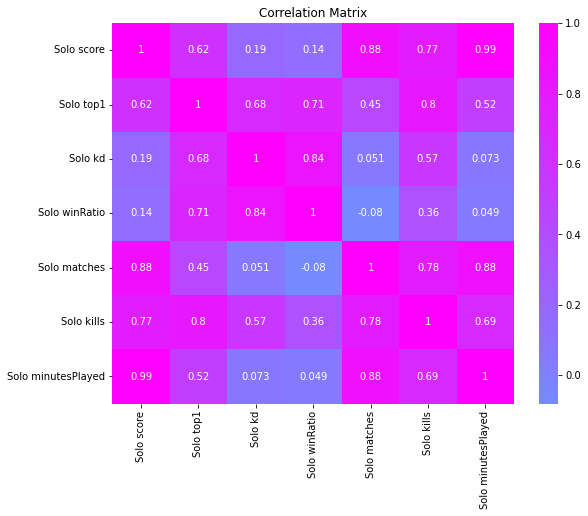

In [87]:
correlation_matrix = solo_player_data.corr()

plt.figure(figsize=(9,7))
sns.heatmap(correlation_matrix, center=0, cmap='cool', robust=True, annot=True)
plt.title('Correlation Matrix')



As we can see above, several variable show a high degree of correlation with one another. 

- "Solo score" is highly correlated with "Solo minutesPlayed", "Solo matches", and "Solo top1". The fact that "Solo score" doesn't show much correlation with "Solo winRatio" and "Solo kd", and that it shows high correlation with "Solo minutesPlayed" may suggests that "Solo score" may not be a good indicator of player skill level. More time playing the game may lead to a higher cumulative solo score but not always to more skill in the game.  

- "Solo top1" shows a high degree of correlation with all of the other variables. This shows that it could be a decisive variable for distinguishing player skill level. The players with lots of wins tend to also have high levels of all of the other player stats so it reasonable to assume that these must also be the best players.

- "Solo winRatio" only shows significant correlation with "Solo kd" and "Solo top1". The correlation with "Solo top1" is obvious, in order to have a high "Solo winRatio" you must win a lot of games. The correlation with "Solo kd" might be best explained by the negative correlation that "Solo winRatio" has with "Solo minutesPlayed" and it's low correlation with "Solo matches". Players with high "Solo winRatio's" may not have played the game enough accumulate enough losses to offset their win total early on. This suggests that gaining skill also requires losing a lot of matches. 

## Split data into training and test sets

In [88]:
X = solo_player_data

X_train, X_test = train_test_split(solo_player_data, test_size=0.3, random_state=27)

## Normalize training data and create ML model

I will use the normalized data set for training the data set

In [89]:
norm = MinMaxScaler().fit(X_train)

X_train_norm = norm.transform(X_train)

X_test_norm = norm.transform(X_test)



In [90]:
# solo_normal = (solo_player_data-solo_player_data.min())/(solo_player_data.max()-solo_player_data.min())
# solo_normal.head()

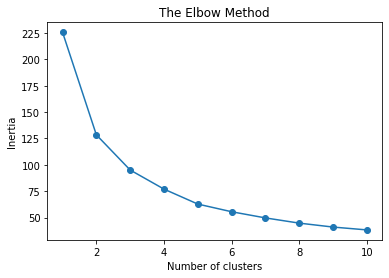

In [91]:
# X = X_train_norm.iloc[:, :].values
X = X_train_norm

inertias = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)
plt.plot(range(1, 11), inertias, marker = 'o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


Based on the above graph, the most optimal number of clusters is either 6 or 7. I will run both and compare metrics.

In [92]:
kmeans_6 = KMeans(n_clusters = 6, init = 'k-means++', random_state = 27)
y_kmeans = kmeans_6.fit_predict(X)

In [93]:

silhouette_score_kmeans = round(silhouette_score(X, y_kmeans), 2)
calinski_harabasz_score_kmeans = round(calinski_harabasz_score(X, y_kmeans), 2)
davies_bouldin = davies_bouldin_score(X, y_kmeans)

print('Silhouette Score : {}'.format(silhouette_score_kmeans))
print('Calinski Harabasz Score : {}'.format(calinski_harabasz_score_kmeans))
print('Davies Bouldin Score: {}'.format(davies_bouldin))

Silhouette Score : 0.34
Calinski Harabasz Score : 571.58
Davies Bouldin Score: 1.006766873444695


In [94]:
kmeans_7 = KMeans(n_clusters = 7, init = 'k-means++', random_state = 27)
y_kmeans = kmeans_7.fit_predict(X)


In [95]:
silhouette_score_kmeans = round(silhouette_score(X, y_kmeans), 2)
calinski_harabasz_score_kmeans = round(calinski_harabasz_score(X, y_kmeans), 2)
davies_bouldin = davies_bouldin_score(X, y_kmeans)

print('Silhouette Score : {}'.format(silhouette_score_kmeans))
print('Calinski Harabasz Score : {}'.format(calinski_harabasz_score_kmeans))
print('Davies Bouldin Score: {}'.format(davies_bouldin))

Silhouette Score : 0.3
Calinski Harabasz Score : 550.32
Davies Bouldin Score: 1.0262221304685202


## Additional analysis: Testing Clustering method with test data

The KMeans ML method performed well and achieved moderate scores. A silhouette score around 0.3 - 0.35 suggests that some overlapping does exist between clusters but some seperation still exists. 

I now want to test the algorithms ability to accurately label new data. I will accomplish this by creating fake player data and use the model to assign it a player skill level. I will know that the model can accurately classify new data by creating a "new player" that is very similar to a player the model has already classified. If the prediction is what I expect then it is reasonable to assume that it can accurately classify new player data.

In [96]:
X = pd.DataFrame(X_train_norm, columns=solo_player_data.columns)

solo_targets = pd.DataFrame({
    'Solo targets': kmeans_6.labels_
})

solo_data_targets = pd.merge(X, solo_targets, left_index=True, right_index=True)


solo_data_targets.head()

,Solo score,Solo top1,Solo kd,Solo winRatio,Solo matches,Solo kills,Solo minutesPlayed,Solo targets
0,0.518266,0.622210,0.878486,0.731707,0.346877,0.693696,0.484575,3
1,0.130648,0.031350,0.201195,0.092683,0.137786,0.076955,0.135657,1
2,0.301850,0.189692,0.340637,0.151220,0.520382,0.471915,0.270170,4
3,0.580147,0.212540,0.398406,0.156098,0.553422,0.583460,0.560988,0
4,0.435168,0.059511,0.235060,0.034146,0.678037,0.442768,0.427271,0


In [97]:
test_labels = kmeans_6.predict(X_test_norm)
silhouette_score_kmeans = round(silhouette_score(X_test_norm, test_labels), 2)

print('Test Set Silhouette Score : {}'.format(silhouette_score_kmeans))

Test Set Silhouette Score : 0.32


In [98]:
test_player = pd.DataFrame(
    [[0.21, 0.065, 0.150, 0.17, 0.16, 0.065, 0.21]],
    index=[1],
    columns=solo_player_data.columns
    )


kmeans_6.predict(test_player)

C:\Users\joeyc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(


array([1])


As demonstrated above, the model is able to assign "new players" to a particular skill cluster based on new data given to it. As any single players data changes, that players new data can be reassigned depending on how the data has changed.

# Conclusion

During this project I sought to determine whether KMeans clustering could be used to seperate players into different skill groups based on their video game data. I did prove that KMeans is an adequate machine learning method for classifying players but the models only performed moderately well when evaluated using various scoring algorithms. Of course, the only true measure of whether or not this model is performing as desired is by evaluating players' gameplay experience. A video game developer should consider doing a player experience survey soon after implementing a model like this so that the model can be refined. 

One aspect of this method of player skill classification that fails is that it does not take into account long breaks that players may spend away from playing the game. If a player takes a months long break this can impact their skill in the game. One way to remedy this would be to only consider player data from a short period of time instead of the entire timespan of the players account. 